# **TAREA 2** 

Integrantes:

-SEQUEIROS ORTIZ EDUARDO JAIME

-MIRANDA HUARANCCA GUILLERMO MARIO

-HUARANCCA ÑAUPARI YONNY

-QUISOCALA MACHACA EDWARD

##Transformada Fourier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


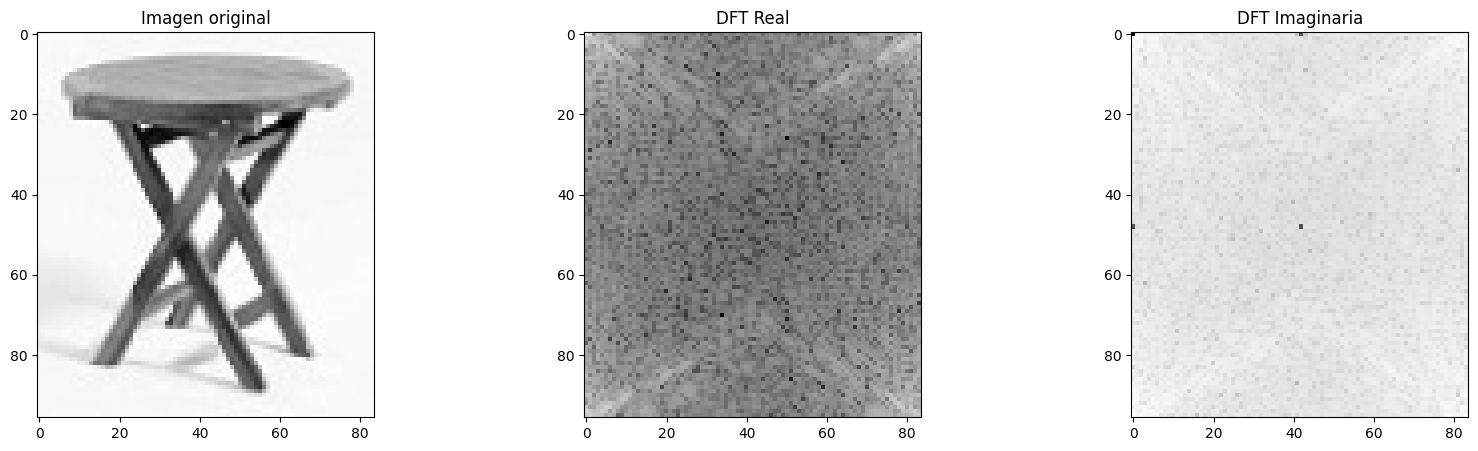

In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

# Cargar imagen

img = Image.open('/content/drive/MyDrive/paisaje4.jpg').convert('L')

# Convertir la imagen en un arreglo NumPy
img_array = np.array(img)

# Calcular la DFT en 2D
def DFT2D(image):
    M, N = image.shape
    dft2d = np.zeros_like(image, dtype=np.complex128)
    pi=np.pi
    for u in range(M):
        for v in range(N):
            dft2d[u, v] = sum([sum([image[x, y] * np.exp(-2j * pi * ((u * x) / M + (v * y) / N)) 
                for y in range(N)]) for x in range(M)])
    return dft2d

# Calcular la DFT de la imagen
img_dft = DFT2D(img_array)

# Calcular la parte real, imaginaria y magnitud de la DFT
dft_real = np.zeros_like(img_dft, dtype=float)
dft_imag = np.zeros_like(img_dft, dtype=float)
dft_mag = np.zeros_like(img_dft, dtype=float)
for i in range(img_dft.shape[0]):
    for j in range(img_dft.shape[1]):
        dft_real[i, j] = img_dft[i, j].real
        dft_imag[i, j] = img_dft[i, j].imag
        

# Visualizar la imagen original y la parte real, imaginaria y magnitud de la DFT
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].imshow(img_array, cmap='gray')
axs[0].set_title('Imagen original')

axs[1].imshow(np.log10(np.abs(dft_real)), cmap='gray')
axs[1].set_title('DFT Real')

axs[2].imshow(np.log10(np.abs(dft_imag) + 1e-16), cmap='gray')
axs[2].set_title('DFT Imaginaria')


plt.show()


##Template matching

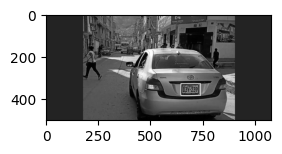

[[ 1.0000000e+00  4.0000000e+00 -1.8626451e-09 ... -1.8626451e-09
  -1.8626451e-09 -1.8626451e-09]
 [-1.0000000e+00  5.0000000e+00  3.0000000e+00 ... -1.8626451e-09
   1.0000000e+00  1.0000000e+00]
 [ 2.0000000e+00  3.0000000e+00  4.0000000e+00 ... -4.0000000e+00
  -2.0000000e+00 -3.0000000e+00]
 ...
 [-2.0000000e+00 -1.0000000e+00 -4.0000000e+00 ... -1.8626451e-09
  -3.0000000e+00  1.0000000e+00]
 [ 2.0000000e+00  4.0000000e+00 -1.8626451e-09 ... -2.0000000e+00
  -2.0000000e+00 -5.0000000e+00]
 [ 2.0000000e+00 -2.0000000e+00  3.0000000e+00 ... -2.0000000e+00
  -1.8626451e-09 -1.0000000e+00]]


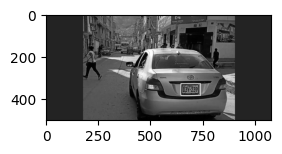

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


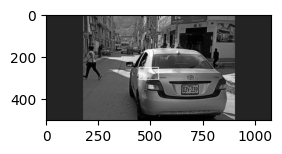

[[15275751. 15275754. 15275750. ... 15275750. 15275750. 15275750.]
 [15275749. 15275755. 15275753. ... 15275750. 15275751. 15275751.]
 [15275752. 15275753. 15275754. ... 15275746. 15275748. 15275747.]
 ...
 [15275748. 15275749. 15275746. ... 15275750. 15275747. 15275751.]
 [15275752. 15275754. 15275750. ... 15275748. 15275748. 15275745.]
 [15275752. 15275748. 15275753. ... 15275748. 15275750. 15275749.]]


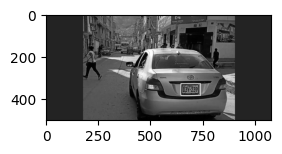

[[0.8620024  0.86200255 0.8620023  ... 0.8620023  0.8620023  0.8620023 ]
 [0.86200225 0.8620026  0.8620025  ... 0.8620023  0.8620024  0.8620024 ]
 [0.86200243 0.8620025  0.86200255 ... 0.8620021  0.8620022  0.86200213]
 ...
 [0.8620022  0.86200225 0.8620021  ... 0.8620023  0.86200213 0.8620024 ]
 [0.86200243 0.86200255 0.8620023  ... 0.8620022  0.8620022  0.862002  ]
 [0.86200243 0.8620022  0.8620025  ... 0.8620022  0.8620023  0.86200225]]


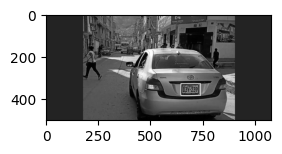

[[23858460. 23858454. 23858462. ... 23858462. 23858462. 23858462.]
 [23858464. 23858452. 23858456. ... 23858462. 23858460. 23858460.]
 [23858458. 23858456. 23858454. ... 23858470. 23858466. 23858468.]
 ...
 [23858466. 23858464. 23858470. ... 23858462. 23858468. 23858460.]
 [23858458. 23858454. 23858462. ... 23858466. 23858466. 23858472.]
 [23858458. 23858466. 23858456. ... 23858466. 23858462. 23858464.]]


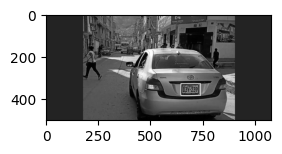

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
imgX = cv2.imread('/content/drive/MyDrive/objetivo.jpg',0)
imgY = imgX.copy()
template = cv2.imread('/content/drive/MyDrive/plantilla.jpg',0)
w, h = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = imgY.copy()
    method = eval(meth)

    res = cv2.matchTemplate(img,template,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(122),plt.imshow(img,cmap = 'gray')

    plt.show()
    print(res)